In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
class Bandit_G:
    def __init__(self, m):
        self.m = m #true mean
        self.mean = 0 #Estimate of our bandit's mean
        self.N = 0
        
    def pull(self): #simulates pulling the bandit's arm.
        return np.random.randn() + self.m #Every bandit's reward will be gaussian with unit variants
    
    def update(self, X):
        self.N += 1
        self.mean = (1-(1/self.N))*(self.mean) + (X/self.N)

In [34]:
class Bandit_O:
    def __init__(self, m, upperlimit):
        self.m = m #true mean
        self.mean = upperlimit #Estimate of our bandit's mean
        self.N = 1

    def pull(self): #simulates pulling the bandit's arm.
        return np.random.randn() + self.m #Every bandit's reward will be gaussian with unit variants
    
    def update(self, X):
        self.N += 1
        self.mean = (1-(1/self.N))*(self.mean) + (X/self.N)


In [35]:
def run_experiment_optimistic_inital_values(m1, m2, m3, eps, N):
    bandits = [Bandit_O(m1, 10), Bandit_O(m2, 10), Bandit_O(m3, 10)]
    data = np.empty(N)
    
    for i in range(N):
        #Epsilon Greedy
    
        p = np.random.rand() 
    
        j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.mean)
    
    return cumulative_average

In [36]:
def run_experiment_epsilon_greedy(m1, m2, m3, eps, N):
    bandits = [Bandit_G(m1), Bandit_G(m2), Bandit_G(m3)]
    data = np.empty(N)
    
    for i in range(N):
        #Epsilon Greedy
    
        p = np.random.rand() 
    
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.mean)
    
    return cumulative_average

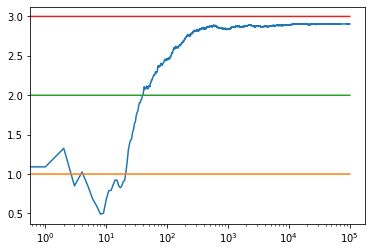

0.9861788560727932
1.9896096544682367
3.006606275901994


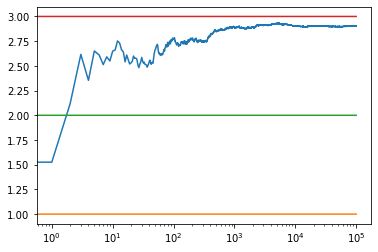

1.0223282072423345
2.0013470765912467
3.0035838683947182


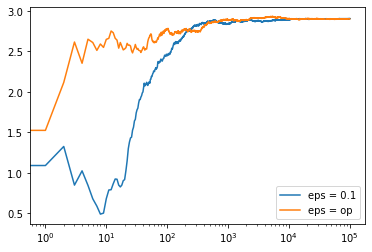

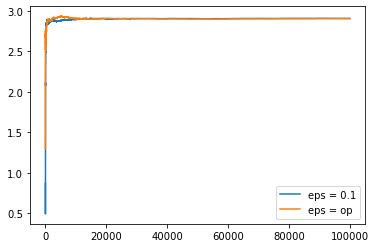

In [38]:
if __name__ == '__main__':
    c10 = run_experiment_epsilon_greedy(1.0, 2.0, 3.0, 0.1, 100000)
    op = run_experiment_epsilon_greedy(1.0, 2.0, 3.0, 0.1, 100000)
    
    #log scale plot
    plt.plot(c10, label = 'eps = 0.1')
    plt.plot(op, label = 'eps = op')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    plt.plot(c10, label = 'eps = 0.1')
    plt.plot(op, label = 'eps = op')
    plt.legend()
    plt.show()
    
    